In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy import table

import numpy as np
import scipy
import h5py
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

from simulation_data import get
from simulation_data.galaxies import GalaxyPopulation
my_galaxy_population = GalaxyPopulation()
from simulation_data.galaxies.galaxy import age_profile, get_star_formation_history, get_galaxy_particle_data, get_stellar_assembly_data, metallicity_profile, metals_profile, gasmetals_profile, metals_density_profile, metals_particle_profile, get_insitu, histmetals_density_profile, halfmass_rad_stars, stellar_density, gasmetals_density_profile, effective_yield, stellar_gas_densities, gasmetals_only, stellar_gas_metallicities, gas_mass, bimodal_check, starmetals_only, stellar_mass, get_stellar_age, gas_consumption

2 540 505
0.7 839 1618
0 432 2423


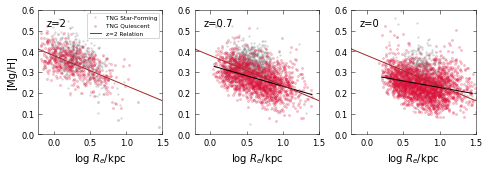

In [6]:
import warnings
warnings.filterwarnings('ignore')

# [Mg/Fe] vs [Fe/H]
####################
fig, axes = plt.subplots(1, 3, figsize=(6.9,2.5), sharey='row') #21, 6
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

def func(x, m, b):
    y = m*x + b
    return y

markersize = 3
alpha = 0.2

# z=2 galaxies
# print(median_age)

fts = 'medium'
ftss = 'small'
ftsss = 'xx-small'

i = -1
data = []
tng2big = []
xlims = [-0.22, 1.5]
ylims = [0.0, 0.6]
redshiftlist = [2, 0.7, 0]
criteria = -3 #cutoff for star-forming/quiescent
xlabel = r'log $R_e$/kpc'
ylabel = '[Mg/H]'
cbarlabel = r'log $R_e$/kpc'
color = 'brown'
xtrend = [0, 0.05, 0.2, 1.4, 1.45]
trends = []

for ax in axes:
    i += 1
    
    # get redshift data
    redshift = redshiftlist[i]
    with h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'r') as f:
        ids = f['ids'][:]
        median_age = f['median_age'][:]
        halfmass_radius = f['halfmass_radius'][:]
        total_mass = f['total_mass'][:]
        FeH_Re = f['FeH_Re'][:]
        MgFe_Re = f['MgFe_Re'][:]
        MgH_Re = f['MgH_Re'][:]
        gas_mass_1kpc = f['gas_mass_1kpc'][:]
        stellar_mass_1kpc = f['stellar_mass_1kpc'][:]
#         percentile_age = f['percentile_age'][:]
    starforming_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))>criteria)
    quiescent_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))<=criteria)
    
    print(redshift, len(ids[starforming_selection]), len(ids[quiescent_selection]))
    
    # get x and y points
    xx_quiescent = np.log10(np.array(halfmass_radius[quiescent_selection]))
    yy_quiescent = MgH_Re[quiescent_selection]
    xx_sf = np.log10(np.array(halfmass_radius[starforming_selection]))
    yy_sf = MgH_Re[starforming_selection]
    
    # color coding
#     vmin = min(xx_quiescent)
#     vmax = max(xx_quiescent)
#     colormap = plt.get_cmap('cool')
#     norm = colors.Normalize(vmin=xlims[0], vmax=xlims[1])
#     color = colormap(norm(xx_quiescent))
    
    # plot TNG markers
    tng1, = ax.plot(xx_sf, yy_sf, '.', color='gray',
               alpha=alpha, label='TNG Star-Forming', markersize=markersize, zorder=0)
    tng2 = ax.scatter(xx_quiescent, yy_quiescent, marker='.', color='crimson',
               alpha=alpha, label='TNG Quiescent', s=(markersize+1)**2, zorder=1)
    tng2big.append(tng2)

    # plot TNG quiescent model
    if i == 0: #z=2
        optParam, pcov = curve_fit(func, xx_quiescent, yy_quiescent)
        xx = np.array(xlims)
    else:
        optParam2, pcov2 = curve_fit(func, xx_quiescent, yy_quiescent)
        xx2 = np.array([xtrend[i], xtrend[i+2]])
        thing, = ax.plot(xx2, func(xx2, *optParam2), '-', color='k', linewidth=1, label='z='+str(redshift)+' Relation')
        trends.append(thing)
    z2trend, = ax.plot(xx, func(xx, *optParam), '-', color=color, linewidth=1, label='z=2 Relation')

    # observations
#     if i == 0:
#         for s in samples:
#             thing = ax.errorbar(s['[Mg/H]'], s['[Mg/Fe]'], xerr=s['[Mg/H]_err'], yerr=s['[Mg/Fe]_err'], **s.meta)
#             data.append(thing)

    # labels
    if i==0:
        ax.set(xlabel=xlabel, ylabel=ylabel,
              ylim=ylims, xlim=xlims)
    else:
        ax.set(xlabel=xlabel, ylabel=None,
              ylim=ylims, xlim=xlims)
    ax.tick_params(direction='in', which='both', bottom=True, top=True, left=True, right=True, labelsize=ftss, width=0.5)
    ax.text(0.07, 0.87, 'z='+str(redshift), transform=ax.transAxes, fontsize=fts)
    ax.yaxis.set_tick_params(labelbottom=True)
#     ax.text(0.15, 0.87, 'z='+str(redshift), fontsize=fts, horizontalalignment='center', verticalalignment='center',
#            transform=ax.transAxes)
#     ax.set_title('z='+str(redshift), fontsize=fts, pad=30)
    
    # colorbar
#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("top", size="7%", pad=0.0)
#     sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
#     sm.set_array([])
#     cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')#, format=fmt)#, format='%.0e')
#     cbar.outline.set_linewidth(0.5)
# #     cbar.ax.yaxis.set_offset_position('left')
# #     cbar.set_label(cbarlabel, rotation=0, labelpad=-35, fontsize=fts)#, fontsize='medium')
#     cbar.ax.tick_params(direction='in', labeltop=True, labelbottom=False, top=True, bottom=False, labelsize=ftss, width=0.5)#, length=5)

    # skinny boxes
    for side in ax.spines.keys():  # 'top', 'bottom', 'left', 'right'
        ax.spines[side].set_linewidth(0.5)
    
# plt.rcParams['axes.labelsize'] = fts+1

# legend
ax1.legend(handles=[tng1, tng2big[1], z2trend], loc='upper right', fontsize=ftsss).set_zorder(200)
# ax2.legend(handles=[trends[0], z2trend], loc='upper right', fontsize=ftsss)
# ax3.legend(handles=[trends[1], z2trend], loc='upper right', fontsize=ftsss)
# leg1 = ax1.legend(handles=[data[0], data[1], data[2]], loc='lower right', fontsize=ftsss)#.set_zorder(200)
# leg1.set_zorder(200)
# for t in leg1.get_texts():
#    t.set_multialignment('right')
# leg1._legend_box.align = "right"
# ax1.legend(loc='lower right').set_zorder(200) #, fontsize=ftss

# for ax in axes:
#     for side in ax.spines.keys():  # 'top', 'bottom', 'left', 'right'
#         ax.spines[side].set_linewidth(0.5)

fig.tight_layout(w_pad=0.9)

plt.savefig('2022 FIGURES\z0-2_MgHRe.png', dpi=300, bbox_inches='tight')
plt.show()

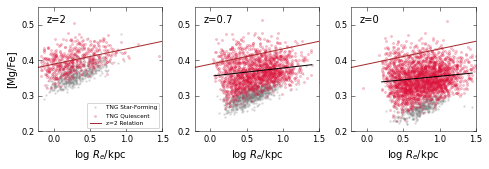

In [5]:
import warnings
warnings.filterwarnings('ignore')

# [Mg/Fe] vs [Fe/H]
####################
fig, axes = plt.subplots(1, 3, figsize=(6.9,2.45), sharey='row') #21, 6
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

def func(x, m, b):
    y = m*x + b
    return y

markersize = 3
alpha = 0.2

# z=2 galaxies
# print(median_age)

fts = 'medium'
ftss = 'small'
ftsss = 'xx-small'

i = -1
data = []
tng2big = []
xlims = [-0.22, 1.5]
ylims = [0.2, 0.55]
redshiftlist = [2, 0.7, 0]
criteria = -3 #cutoff for star-forming/quiescent
xlabel = r'log $R_e$/kpc'
ylabel = '[Mg/Fe]'
cbarlabel = r'log $R_e$/kpc'
color = 'brown'
xtrend = [0, 0.05, 0.2, 1.4, 1.45]
trends = []

for ax in axes:
    i += 1
    
    # get redshift data
    redshift = redshiftlist[i]
    with h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'r') as f:
        median_age = f['median_age'][:]
        halfmass_radius = f['halfmass_radius'][:]
        total_mass = f['total_mass'][:]
        FeH_Re = f['FeH_Re'][:]
        MgFe_Re = f['MgFe_Re'][:]
        MgH_Re = f['MgH_Re'][:]
        gas_mass_1kpc = f['gas_mass_1kpc'][:]
        stellar_mass_1kpc = f['stellar_mass_1kpc'][:]
#         percentile_age = f['percentile_age'][:]
    starforming_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))>criteria)
    quiescent_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))<=criteria)
    
    # get x and y points
    xx_quiescent = np.log10(np.array(halfmass_radius[quiescent_selection]))
    yy_quiescent = MgFe_Re[quiescent_selection]
    xx_sf = np.log10(np.array(halfmass_radius[starforming_selection]))
    yy_sf = MgFe_Re[starforming_selection]
    
    # color coding
#     vmin = min(xx_quiescent)
#     vmax = max(xx_quiescent)
#     colormap = plt.get_cmap('cool')
#     norm = colors.Normalize(vmin=xlims[0], vmax=xlims[1])
#     color = colormap(norm(xx_quiescent))
    
    # plot TNG markers
    tng1, = ax.plot(xx_sf, yy_sf, '.', color='gray',
               alpha=alpha, label='TNG Star-Forming', markersize=markersize, zorder=0)
    tng2 = ax.scatter(xx_quiescent, yy_quiescent, marker='.', color='crimson',
               alpha=alpha, label='TNG Quiescent', s=(markersize+1)**2, zorder=1)
    tng2big.append(tng2)

    # plot TNG quiescent model
    if i == 0: #z=2
        optParam, pcov = curve_fit(func, xx_quiescent, yy_quiescent)
        xx = np.array(xlims)
    else:
        optParam2, pcov2 = curve_fit(func, xx_quiescent, yy_quiescent)
        xx2 = np.array([xtrend[i], xtrend[i+2]])
        thing, = ax.plot(xx2, func(xx2, *optParam2), '-', color='k', linewidth=1, label='z='+str(redshift)+' Relation')
        trends.append(thing)
    z2trend, = ax.plot(xx, func(xx, *optParam), '-', color=color, linewidth=1, label='z=2 Relation')

    # observations
#     if i == 0:
#         for s in samples:
#             thing = ax.errorbar(s['[Mg/H]'], s['[Mg/Fe]'], xerr=s['[Mg/H]_err'], yerr=s['[Mg/Fe]_err'], **s.meta)
#             data.append(thing)

    # labels
    if i==0:
        ax.set(xlabel=xlabel, ylabel=ylabel,
              ylim=ylims, xlim=xlims)
    else:
        ax.set(xlabel=xlabel, ylabel=None,
              ylim=ylims, xlim=xlims)
    ax.tick_params(direction='in', which='both', bottom=True, top=True, left=True, right=True, labelsize=ftss, width=0.5)
    ax.text(0.07, 0.87, 'z='+str(redshift), transform=ax.transAxes, fontsize=fts)
    ax.yaxis.set_tick_params(labelbottom=True)
    ax.set_yticks([0.2, 0.3, 0.4, 0.5], minor=False)
    ax.set_yticklabels(['0.2', '0.3', '0.4', '0.5'])
#     ax.text(0.15, 0.87, 'z='+str(redshift), fontsize=fts, horizontalalignment='center', verticalalignment='center',
#            transform=ax.transAxes)
#     ax.set_title('z='+str(redshift), fontsize=fts, pad=30)
    
    # colorbar
#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("top", size="7%", pad=0.0)
#     sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
#     sm.set_array([])
#     cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')#, format=fmt)#, format='%.0e')
#     cbar.outline.set_linewidth(0.5)
# #     cbar.ax.yaxis.set_offset_position('left')
# #     cbar.set_label(cbarlabel, rotation=0, labelpad=-35, fontsize=fts)#, fontsize='medium')
#     cbar.ax.tick_params(direction='in', labeltop=True, labelbottom=False, top=True, bottom=False, labelsize=ftss, width=0.5)#, length=5)

    # skinny boxes
    for side in ax.spines.keys():  # 'top', 'bottom', 'left', 'right'
        ax.spines[side].set_linewidth(0.5)
    
# plt.rcParams['axes.labelsize'] = fts+1

# legend
ax1.legend(handles=[tng1, tng2big[1], z2trend], loc='lower right', fontsize=ftsss).set_zorder(200)
# ax2.legend(handles=[trends[0], z2trend], loc='lower right', fontsize=ftsss)
# ax3.legend(handles=[trends[1], z2trend], loc='lower right', fontsize=ftsss)
# leg1 = ax1.legend(handles=[data[0], data[1], data[2]], loc='lower right', fontsize=ftsss)#.set_zorder(200)
# leg1.set_zorder(200)
# for t in leg1.get_texts():
#    t.set_multialignment('right')
# leg1._legend_box.align = "right"
# ax1.legend(loc='lower right').set_zorder(200) #, fontsize=ftss

# for ax in axes:
#     for side in ax.spines.keys():  # 'top', 'bottom', 'left', 'right'
#         ax.spines[side].set_linewidth(0.5)

fig.tight_layout(w_pad=0.9)

plt.savefig('2022 FIGURES\z0-2_MgFeRe.png', dpi=300, bbox_inches='tight')
plt.show()

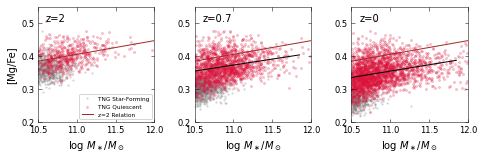

In [4]:
import warnings
warnings.filterwarnings('ignore')

# [Mg/Fe] vs [Fe/H]
####################
fig, axes = plt.subplots(1, 3, figsize=(6.9,2.38), sharey='row') #21, 6
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

def func(x, m, b):
    y = m*x + b
    return y

markersize = 3
alpha = 0.2

# z=2 galaxies
# print(median_age)

fts = 'medium'
ftss = 'small'
ftsss = 'xx-small'

i = -1
data = []
tng2big = []
xlims = [10.5, 12]
ylims = [0.2, 0.55]
redshiftlist = [2, 0.7, 0]
criteria = -3 #cutoff for star-forming/quiescent
xlabel = r'log $M_\ast/M_\odot$'
ylabel = '[Mg/Fe]'
cbarlabel = r'log $R_e$/kpc'
color = 'brown'
xtrend = [0, 0.05, 0.2, 1.4, 1.45]
trends = []

for ax in axes:
    i += 1
    
    # get redshift data
    redshift = redshiftlist[i]
    with h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'r') as f:
        median_age = f['median_age'][:]
        halfmass_radius = f['halfmass_radius'][:]
        total_mass = f['total_mass'][:]
        FeH_Re = f['FeH_Re'][:]
        MgFe_Re = f['MgFe_Re'][:]
        MgH_Re = f['MgH_Re'][:]
        gas_mass_1kpc = f['gas_mass_1kpc'][:]
        stellar_mass_1kpc = f['stellar_mass_1kpc'][:]
#         percentile_age = f['percentile_age'][:]
    starforming_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))>criteria)
    quiescent_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))<=criteria)
    
    # get x and y points
    xx_quiescent = total_mass[quiescent_selection]
    yy_quiescent = MgFe_Re[quiescent_selection]
    xx_sf = total_mass[starforming_selection]
    yy_sf = MgFe_Re[starforming_selection]
    
    # color coding
#     vmin = min(xx_quiescent)
#     vmax = max(xx_quiescent)
#     colormap = plt.get_cmap('cool')
#     norm = colors.Normalize(vmin=xlims[0], vmax=xlims[1])
#     color = colormap(norm(xx_quiescent))
    
    # plot TNG markers
    tng1, = ax.plot(xx_sf, yy_sf, '.', color='gray',
               alpha=alpha, label='TNG Star-Forming', markersize=markersize, zorder=0)
    tng2 = ax.scatter(xx_quiescent, yy_quiescent, marker='.', color='crimson',
               alpha=alpha, label='TNG Quiescent', s=(markersize+1)**2, zorder=1)
    tng2big.append(tng2)

    # plot TNG quiescent model
    if i == 0: #z=2
        optParam, pcov = curve_fit(func, xx_quiescent, yy_quiescent)
        xx = np.array(xlims)
    else:
        optParam2, pcov2 = curve_fit(func, xx_quiescent, yy_quiescent)
        xx2 = np.array([10.5, 11.85])
        thing, = ax.plot(xx2, func(xx2, *optParam2), '-', color='k', linewidth=1, label='z='+str(redshift)+' Relation')
        trends.append(thing)
    z2trend, = ax.plot(xx, func(xx, *optParam), '-', color=color, linewidth=1, label='z=2 Relation')

    # observations
#     if i == 0:
#         for s in samples:
#             thing = ax.errorbar(s['[Mg/H]'], s['[Mg/Fe]'], xerr=s['[Mg/H]_err'], yerr=s['[Mg/Fe]_err'], **s.meta)
#             data.append(thing)

    # labels
    if i==0:
        ax.set(xlabel=xlabel, ylabel=ylabel,
              ylim=ylims, xlim=xlims)
    else:
        ax.set(xlabel=xlabel, ylabel=None,
              ylim=ylims, xlim=xlims)
    ax.tick_params(direction='in', which='both', bottom=True, top=True, left=True, right=True, labelsize=ftss, width=0.5)
    ax.text(0.07, 0.87, 'z='+str(redshift), transform=ax.transAxes, fontsize=fts)
    ax.yaxis.set_tick_params(labelbottom=True)
#     ax.text(0.15, 0.87, 'z='+str(redshift), fontsize=fts, horizontalalignment='center', verticalalignment='center',
#            transform=ax.transAxes)
#     ax.set_title('z='+str(redshift), fontsize=fts, pad=30)
    
    # colorbar
#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("top", size="7%", pad=0.0)
#     sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
#     sm.set_array([])
#     cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')#, format=fmt)#, format='%.0e')
#     cbar.outline.set_linewidth(0.5)
# #     cbar.ax.yaxis.set_offset_position('left')
# #     cbar.set_label(cbarlabel, rotation=0, labelpad=-35, fontsize=fts)#, fontsize='medium')
#     cbar.ax.tick_params(direction='in', labeltop=True, labelbottom=False, top=True, bottom=False, labelsize=ftss, width=0.5)#, length=5)

    # skinny boxes
    for side in ax.spines.keys():  # 'top', 'bottom', 'left', 'right'
        ax.spines[side].set_linewidth(0.5)
    
# plt.rcParams['axes.labelsize'] = fts+1

# legend
ax1.legend(handles=[tng1, tng2big[1], z2trend], loc='lower right', fontsize=ftsss).set_zorder(200)
# ax2.legend(handles=[trends[0], z2trend], loc='lower right', fontsize=ftsss)
# ax3.legend(handles=[trends[1], z2trend], loc='lower right', fontsize=ftsss)
# leg1 = ax1.legend(handles=[data[0], data[1], data[2]], loc='lower right', fontsize=ftsss)#.set_zorder(200)
# leg1.set_zorder(200)
# for t in leg1.get_texts():
#    t.set_multialignment('right')
# leg1._legend_box.align = "right"
# ax1.legend(loc='lower right').set_zorder(200) #, fontsize=ftss

# for ax in axes:
#     for side in ax.spines.keys():  # 'top', 'bottom', 'left', 'right'
#         ax.spines[side].set_linewidth(0.5)

fig.tight_layout(w_pad=0.9)

plt.savefig('2022 FIGURES\z0-2_MgFeMass.png', dpi=300, bbox_inches='tight')
plt.show()

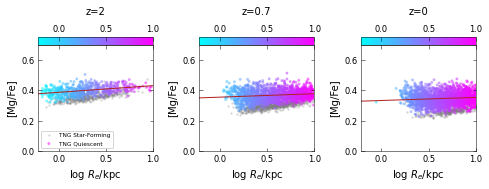

In [36]:
import warnings
warnings.filterwarnings('ignore')

# [Mg/Fe] vs [Fe/H]
####################
fig, axes = plt.subplots(1, 3, figsize=(6.9,2.7)) #21, 6
ax1 = axes[0]
ax2 = axes[1]

def func(x, m, b):
    y = m*x + b
    return y

markersize = 3
alpha = 0.2

# ### MEDIAN AGE ########
# vmin_med = min(median_age[quiescent_selection])
# vmax_med = max(median_age[quiescent_selection])
# hexlist = ['#ffe200', '#dd0000']
# colormap_med = get_continuous_cmap(hexlist)
# # colormap_med = plt.get_cmap('summer')
# norm_med = colors.Normalize(vmin=vmin_med, vmax=vmax_med)
# color_med = colormap_med(norm_med(median_age[quiescent_selection]))

# ### 90 - 10 AGE ########
# vmin_age = min(percentile_age[quiescent_selection])
# vmax_age = max(percentile_age[quiescent_selection])
# hexlist = ['#6d33c6', '#Ff0036']# '#fb2047']
# colormap_age = get_continuous_cmap(hexlist)
# # colormap_age = plt.get_cmap('summer')
# norm_age = colors.Normalize(vmin=vmin_age, vmax=vmax_age)
# color_age = colormap_age(norm_age(percentile_age[quiescent_selection]))

# ### 90 - 10 AGE ########
# radius_quiescent = np.log10(np.array(halfmass_radius[quiescent_selection]))
# vmin_r = min(radius_quiescent)
# vmax_r = max(radius_quiescent)
# colormap_r = plt.get_cmap('cool')
# norm_r = colors.Normalize(vmin=vmin_r, vmax=vmax_r)
# color_r = colormap_r(norm_r(radius_quiescent))

# colormaps = [colormap_med, colormap_age, colormap_r]
# colorlist = [color_med, color_age, color_r]
# normlist = [norm_med, norm_age, norm_r]
# cbar_labels = ['Median Age (Gyr)', 'Star Formation Timescale (Gyr)', 'log $R_e$/kpc']

# z=2 galaxies
# print(median_age)

fts = 'medium'
ftss = 'small'
ftsss = 'xx-small'

i = -1
data = []
tng2big = []
xlims = [-0.22, 1.0]
ylims = [0, 0.7]
redshiftlist = [2, 0.7, 0]
criteria = [-1.75, -4, -2.2] #cutoff for star-forming/quiescent
xlabel = r'log $R_e$/kpc'
ylabel = '[Mg/Fe]'
cbarlabel = r'log $R_e$/kpc'


for ax in axes:
    i += 1
    
    # get redshift data
    redshift = redshiftlist[i]
    with h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'r') as f:
        median_age = f['median_age'][:]
        halfmass_radius = f['halfmass_radius'][:]
        total_mass = f['total_mass'][:]
        FeH_Re = f['FeH_Re'][:]
        MgFe_Re = f['MgFe_Re'][:]
        MgH_Re = f['MgH_Re'][:]
        gas_mass_1kpc = f['gas_mass_1kpc'][:]
        stellar_mass_1kpc = f['stellar_mass_1kpc'][:]
#         percentile_age = f['percentile_age'][:]
    starforming_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))>criteria[i])
    quiescent_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))<=criteria[i])
    
    # get x and y points
    xx_quiescent = np.log10(np.array(halfmass_radius[quiescent_selection]))
    yy_quiescent = MgFe_Re[quiescent_selection]
    xx_sf = np.log10(np.array(halfmass_radius[starforming_selection]))
    yy_sf = MgFe_Re[starforming_selection]
    
    # color coding
    vmin = min(xx_quiescent)
    vmax = max(xx_quiescent)
    colormap = plt.get_cmap('cool')
    norm = colors.Normalize(vmin=xlims[0], vmax=xlims[1])
    color = colormap(norm(xx_quiescent))
    
    # plot TNG markers
    tng1, = ax.plot(xx_sf, yy_sf, '.', color='gray',
               alpha=alpha, label='TNG Star-Forming', markersize=markersize, zorder=0)
    tng2 = ax.scatter(xx_quiescent, yy_quiescent, marker='.', cmap=colormap, c=color,
               alpha=alpha+0.2, label='TNG Quiescent', s=(markersize+1)**2, zorder=1)
    tng2big.append(tng2)

    # plot TNG quiescent model
    optParam, pcov = curve_fit(func, xx_quiescent, yy_quiescent)
    xx = np.array(xlims)
    ax.plot(xx, func(xx, *optParam), '-', color='firebrick', linewidth=1)

    # observations
#     if i == 0:
#         for s in samples:
#             thing = ax.errorbar(s['[Mg/H]'], s['[Mg/Fe]'], xerr=s['[Mg/H]_err'], yerr=s['[Mg/Fe]_err'], **s.meta)
#             data.append(thing)

    # labels
    ax.set(xlabel=xlabel, ylabel=ylabel,
          ylim=ylims, xlim=xlims)
    ax.tick_params(direction='in', which='both', bottom=True, top=True, left=True, right=True, labelsize=ftss, width=0.5)
    ax.set_title('z='+str(redshift), fontsize=fts, pad=30)
    
    # colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("top", size="7%", pad=0.0)
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')#, format=fmt)#, format='%.0e')
    cbar.outline.set_linewidth(0.5)
#     cbar.ax.yaxis.set_offset_position('left')
#     cbar.set_label(cbarlabel, rotation=0, labelpad=-35, fontsize=fts)#, fontsize='medium')
    cbar.ax.tick_params(direction='in', labeltop=True, labelbottom=False, top=True, bottom=False, labelsize=ftss, width=0.5)#, length=5)

    # skinny boxes
    for side in ax.spines.keys():  # 'top', 'bottom', 'left', 'right'
        ax.spines[side].set_linewidth(0.5)
    
# plt.rcParams['axes.labelsize'] = fts+1

# legend
ax1.legend(handles=[tng1, tng2big[1]], loc='lower left', fontsize=ftsss).set_zorder(200)
# leg1 = ax1.legend(handles=[data[0], data[1], data[2]], loc='lower right', fontsize=ftsss)#.set_zorder(200)
# leg1.set_zorder(200)
# for t in leg1.get_texts():
#    t.set_multialignment('right')
# leg1._legend_box.align = "right"
# ax1.legend(loc='lower right').set_zorder(200) #, fontsize=ftss

# for ax in axes:
#     for side in ax.spines.keys():  # 'top', 'bottom', 'left', 'right'
#         ax.spines[side].set_linewidth(0.5)

fig.tight_layout(w_pad=0.9)

plt.savefig('2022 FIGURES\z0-2_MgFeRe.png', dpi=300, bbox_inches='tight')
plt.show()

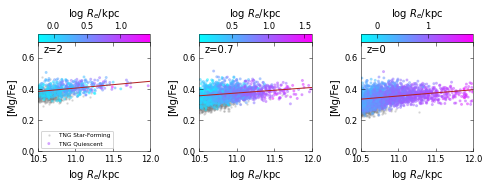

In [35]:
import warnings
warnings.filterwarnings('ignore')

# [Mg/Fe] vs [Fe/H]
####################
fig, axes = plt.subplots(1, 3, figsize=(6.9,2.7)) #21, 6
ax1 = axes[0]
ax2 = axes[1]

def func(x, m, b):
    y = m*x + b
    return y

markersize = 3
alpha = 0.2

# ### MEDIAN AGE ########
# vmin_med = min(median_age[quiescent_selection])
# vmax_med = max(median_age[quiescent_selection])
# hexlist = ['#ffe200', '#dd0000']
# colormap_med = get_continuous_cmap(hexlist)
# # colormap_med = plt.get_cmap('summer')
# norm_med = colors.Normalize(vmin=vmin_med, vmax=vmax_med)
# color_med = colormap_med(norm_med(median_age[quiescent_selection]))

# ### 90 - 10 AGE ########
# vmin_age = min(percentile_age[quiescent_selection])
# vmax_age = max(percentile_age[quiescent_selection])
# hexlist = ['#6d33c6', '#Ff0036']# '#fb2047']
# colormap_age = get_continuous_cmap(hexlist)
# # colormap_age = plt.get_cmap('summer')
# norm_age = colors.Normalize(vmin=vmin_age, vmax=vmax_age)
# color_age = colormap_age(norm_age(percentile_age[quiescent_selection]))

# ### 90 - 10 AGE ########
# radius_quiescent = np.log10(np.array(halfmass_radius[quiescent_selection]))
# vmin_r = min(radius_quiescent)
# vmax_r = max(radius_quiescent)
# colormap_r = plt.get_cmap('cool')
# norm_r = colors.Normalize(vmin=vmin_r, vmax=vmax_r)
# color_r = colormap_r(norm_r(radius_quiescent))

# colormaps = [colormap_med, colormap_age, colormap_r]
# colorlist = [color_med, color_age, color_r]
# normlist = [norm_med, norm_age, norm_r]
# cbar_labels = ['Median Age (Gyr)', 'Star Formation Timescale (Gyr)', 'log $R_e$/kpc']

# z=2 galaxies
# print(median_age)

fts = 'medium'
ftss = 'small'
ftsss = 'xx-small'

i = -1
data = []
tng2big = []
xlims = [10.5, 12]
ylims = [0, 0.7]
redshiftlist = [2, 0.7, 0]
criteria = [-1.75, -4, -2.2] #cutoff for star-forming/quiescent
xlabel = r'log $R_e$/kpc'
ylabel = '[Mg/Fe]'
cbarlabel = r'log $R_e$/kpc'


for ax in axes:
    i += 1
    
    # get redshift data
    redshift = redshiftlist[i]
    with h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'r') as f:
        median_age = f['median_age'][:]
        halfmass_radius = f['halfmass_radius'][:]
        total_mass = f['total_mass'][:]
        FeH_Re = f['FeH_Re'][:]
        MgFe_Re = f['MgFe_Re'][:]
        MgH_Re = f['MgH_Re'][:]
        gas_mass_1kpc = f['gas_mass_1kpc'][:]
        stellar_mass_1kpc = f['stellar_mass_1kpc'][:]
#         percentile_age = f['percentile_age'][:]
    starforming_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))>criteria[i])
    quiescent_selection = (np.log10(gas_mass_1kpc/(gas_mass_1kpc+stellar_mass_1kpc))<=criteria[i])
    
    # get x and y points
    xx_quiescent = total_mass[quiescent_selection]
    yy_quiescent = MgFe_Re[quiescent_selection]
    xx_sf = total_mass[starforming_selection]
    yy_sf = MgFe_Re[starforming_selection]
    
    # color coding
    xx_color = np.log10(np.array(halfmass_radius[quiescent_selection]))
    vmin = min(xx_color)
    vmax = max(xx_color)
    colormap = plt.get_cmap('cool')
    norm = colors.Normalize(vmin=vmin, vmax=vmax)
    color = colormap(norm(xx_color))
    
    # plot TNG markers
    tng1, = ax.plot(xx_sf, yy_sf, '.', color='gray',
               alpha=alpha, label='TNG Star-Forming', markersize=markersize, zorder=0)
    tng2 = ax.scatter(xx_quiescent, yy_quiescent, marker='.', cmap=colormap, c=color,
               alpha=alpha+0.2, label='TNG Quiescent', s=(markersize+1)**2, zorder=1)
    tng2big.append(tng2)

    # plot TNG quiescent model
    optParam, pcov = curve_fit(func, xx_quiescent, yy_quiescent)
    xx = np.array(xlims)
    ax.plot(xx, func(xx, *optParam), '-', color='firebrick', linewidth=1)

    # observations
#     if i == 0:
#         for s in samples:
#             thing = ax.errorbar(s['[Mg/H]'], s['[Mg/Fe]'], xerr=s['[Mg/H]_err'], yerr=s['[Mg/Fe]_err'], **s.meta)
#             data.append(thing)

    # labels
    ax.set(xlabel=xlabel, ylabel=ylabel,
          ylim=ylims, xlim=xlims)
    ax.tick_params(direction='in', which='both', bottom=True, top=True, left=True, right=True, labelsize=ftss, width=0.5)
    ax.text(0.05, 0.9, 'z='+str(redshift), transform=ax.transAxes, fontsize=fts)
    
    # colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("top", size="7%", pad=0.0)
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')#, format=fmt)#, format='%.0e')
    cbar.outline.set_linewidth(0.5)
#     cbar.ax.yaxis.set_offset_position('left')
    cbar.set_label(cbarlabel, rotation=0, labelpad=-35, fontsize=fts)#, fontsize='medium')
    cbar.ax.tick_params(direction='in', labeltop=True, labelbottom=False, top=True, bottom=False, labelsize=ftss, width=0.5)#, length=5)

    # skinny boxes
    for side in ax.spines.keys():  # 'top', 'bottom', 'left', 'right'
        ax.spines[side].set_linewidth(0.5)
    
# plt.rcParams['axes.labelsize'] = fts+1

# legend
ax1.legend(handles=[tng1, tng2big[1]], loc='lower left', fontsize=ftsss).set_zorder(200)
# leg1 = ax1.legend(handles=[data[0], data[1], data[2]], loc='lower right', fontsize=ftsss)#.set_zorder(200)
# leg1.set_zorder(200)
# for t in leg1.get_texts():
#    t.set_multialignment('right')
# leg1._legend_box.align = "right"
# ax1.legend(loc='lower right').set_zorder(200) #, fontsize=ftss

# for ax in axes:
#     for side in ax.spines.keys():  # 'top', 'bottom', 'left', 'right'
#         ax.spines[side].set_linewidth(0.5)

fig.tight_layout(w_pad=0.9)

plt.savefig('2022 FIGURES\z0-2_MgFeMass.png', dpi=300, bbox_inches='tight')
plt.show()